# Practice for 5509 Supervise Machine Learning


# 1. Problem Statement

The background is about a bank whose management wants to explore ways of converting its liability customers to personal loan customers. And a campaign the bank ran for liability customers last year showed a conversion rate of more than 9%. 

As a data scientist at the bank, it is imperative to build a model that helps the marketing department identify potential customers who are more likely to purchase a loan so that targeted marketing can be conducted to increase loan applications. 



# 2.  EDA

### 2.1 DATA PREPROCESSING

#### 2.1.1  Notebook initialization, load necessary packages

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

#### 2.1.2  DATA PREPROCESSING
The file from Kaggle contains data for 5000 customers. The detailed structure is shown in Table1. Data includes customer demographics (age, income, etc.), customer relationship with the bank (mortgage, securities account, etc.), and customer response to the last personal loan activity (personal loan). 

In [2]:
# Load data

data0=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print('Data shape:', data0.shape)
data0.head()

Data shape: (5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Check the schema of the aataFrame
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Get the detail explanation of each column from dataset document

|     Columns                 |     Description                                                                      |
|-----------------------------|--------------------------------------------------------------------------------------|
|     ID                      |     Customer   ID                                                                    |
|     Age                     |     Customer's   age in completed years                                              |
|     Experience              |     Number   of years of professional experience                                     |
|     Income                  |     Annual   income of the customer (000)                                            |
|     ZIPCode                 |     Home   Address ZIP code                                                          |
|     Family                  |     Family   size of the customer                                                    |
|     CCAvg                   |     Avg.   spending on credit cards per month (\$  000)                              |
|     Education               |     Education   Level. 1: Undergrad; 2: Graduate; 3: Advanced or Professional        |
|     Mortgage                |     Value   of house mortgage if any. (\$ 000)                                       |
|     Personal   Loan         |     Did   this customer accept the personal loan offered in the last campaign?       |
|     Securities   Account    |     Does   the customer have a securities account with the bank?                     |
|     CD   Account            |     Does   the customer have a certificate of deposit (CD) account with the bank?    |
|     Online                  |     Does   the customer use internet banking facilities?                             |
|     CreditCard              |     Does   the customer use a credit card issued by this Bank?                       |

In [4]:
# Check the basic statistics of each column
data0.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##### Observations

The ID column in the dataset is a unique number for each customer. And the zip code in the data lists the zip code of the customer's city. So, there is no relationship between the ID column or the zip code column and any other variable. It's necessary to leave them out of the classification model to prevent misdirection. 



In [5]:
# Drop coulmns operation
data1 = data0.drop(['ID', 'ZIP Code'], axis = 1, inplace=False)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [6]:
# Check the basic statistics of each column for the new dataset
data1.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Check the number of records with negative experience

np.sum([data1["Experience"] < 0])

52

##### Observations
* we can see in the describe cell above
* the min value of Experience columns is (-3)
* but we knowe the Experience values must be possitive
* there are 52 observations with negative Experience
* we will remove the records with negative Experience

In [8]:
# Exclude the records with negative Experience value.
data2 = data1.loc[data1["Experience"] >= 0]

### 2.2 DATA EXPLORATION

#### 2.2.1 Check the distribution of each variable

In [9]:
# Check the distribution of the new data

data2.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Observations

* There are no null or (NaN) values in the dataset. 
* The dataset has a mix of numeric and categorical attributes, but all categorical data is represented numerically. 
* Also, some predictors are heavily skewed (long-tailed), 



#### 2.2.2 Check the Correlation of each variable

<function matplotlib.pyplot.show(close=None, block=None)>

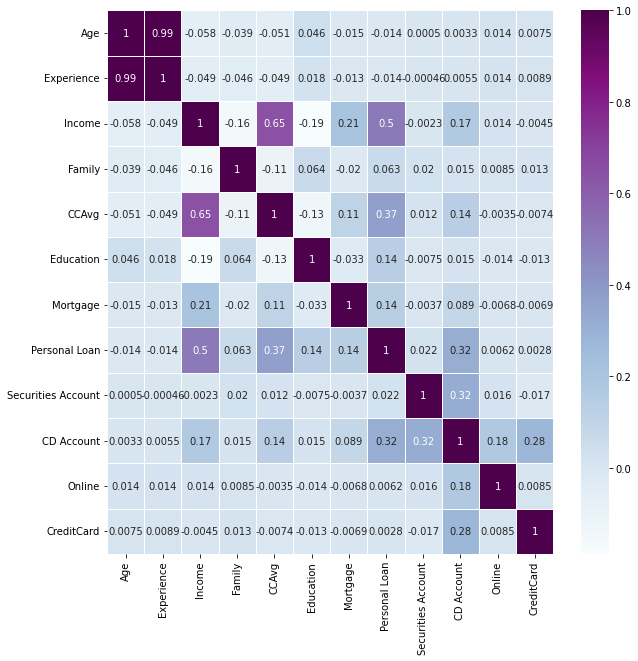

In [10]:
# Check the Correlation of each variable


fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data2.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

##### Observation
* 'Age' and 'Experience' are correlated with each other.

* 'Income' and ‘CCAvg' correlated with each other.
 
* 'CD Account' has a correlation with 'Credit Card', 'Securities Account', 'Online', ‘CCAvg' and 'Income'.
 
* 'Personal Loan' has correlation with 'Income’, 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
 
* 'Mortgage' has moderate correlation with 'Income'
 
* 'Income' influences ‘CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

# 3. MODELING AND EVALUATION

**In this work we will practice 2 kinds of algorithms**
**and see which algorithm has higher AUC**
* LogisticRegression
* RandomForestClassifier

## 3.1  Spliting the data into training and test set in the ratio of 70:30**

In [11]:
# X = data2.drop('Personal Loan', axis = 1).values
X = data2.drop('Personal Loan', axis = 1)
y = data2['Personal Loan'].values.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

X_train.shape

(3463, 11)

In [12]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3395,41,16,35,2,1.4,2,135,0,0,0,0
370,36,12,25,4,1.0,1,147,0,0,0,0
2337,43,16,201,1,10.0,2,0,0,0,0,1
3341,35,9,33,2,0.3,1,0,1,0,1,0
3602,47,21,42,4,0.1,1,0,0,0,1,1


In [13]:
y_train.shape

(3463, 1)

## 3.2 Logistic Regression

### 3.2.1 Logistic Regression (including all variables and without normalization)

In [14]:
# prep for logistic regression

from collections import Counter
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1_score,accuracy_score, classification_report
import scipy.stats as stat


class LogisticReg:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T

        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        eps=1e-4
        F_ij = np.dot((X / denom).T,X) + np.eye(F_ij.shape[0])*eps ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij
        

In [15]:
# Create first pipeline for base without reducing features.
# Use grid search to find the best hyoer parameters(such as solver, panelty function) for logistic regression


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear','newton-cg', 'sag', 'lbfgs' ]}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

lr_model = clf.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [16]:
print(lr_model)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=11.288378916846883,
                                                            solver='newton-cg')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['liblinear', 'newton-cg',
                                                 'sag', 'lbfgs']}],
             verbose=True)


In [17]:
# Build model with logistic regression
lr_model = LogisticReg(C=11.288378916846883,solver='newton-cg')
lr_model.fit(X_train,y_train)


# predict the class label
yhat = lr_model.model.predict(X_test)
yhat = yhat.reshape((len(yhat), 1))
# summarize the predicted class
# print('Predicted Class: %d' % yhat[0])
y_diff = yhat == y_test
unique, counts = np.unique(y_diff, return_counts=True)
print('Accuracy of test data: %.3f ' % (counts[1]/(counts[0] + counts[1])))

Accuracy of test data: 0.954 


In [18]:
# Display the coefficient & P-value of each input variable

print('Features', "|",'Coef', "|", 'P-value' )
for i in range(len(X_train.columns)):
    print(X_train.columns[i], "|",lr_model.model.coef_[0,i], "|", lr_model.p_values[i] )

Features | Coef | P-value
Age | -0.06797396548816324 | 0.010229648365519841
Experience | 0.07700504888698399 | 0.009514893826225891
Income | 0.05367391439708355 | 2.1367855503574054e-71
Family | 0.673404021180574 | 1.5217192497756187e-14
CCAvg | 0.1211109827924873 | 0.010969817436008803
Education | 1.6643243168443123 | 1.526289820500947e-34
Mortgage | 0.0009196757172491444 | 0.15634033939524813
Securities Account | -0.7992340235231095 | 0.019531688946531157
CD Account | 3.861859909664598 | 2.0313923420869428e-22
Online | -0.6931102710196916 | 0.00019841221227437865
CreditCard | -1.2655133984087148 | 3.454176061228562e-07


In [19]:
# Display  accuracy , confusion matrix & Classification Report

print('Accuracy of Train data: %.3f ' % (lr_model.model.score(X_train,y_train)))
print('Accuracy of Test data: %.3f ' % accuracy_score(y_test, yhat) )
print('------------------------------------------------------------------------')
print('Confusion Matrix on Test data:')
print(confusion_matrix(y_test, yhat))
print('------------------------------------------------------------------------')
print('Classification Report on Test data:')
print(classification_report(y_test, yhat))

Accuracy of Train data: 0.952 
Accuracy of Test data: 0.954 
------------------------------------------------------------------------
Confusion Matrix on Test data:
[[1323   17]
 [  51   94]]
------------------------------------------------------------------------
Classification Report on Test data:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.85      0.65      0.73       145

    accuracy                           0.95      1485
   macro avg       0.90      0.82      0.85      1485
weighted avg       0.95      0.95      0.95      1485



AUC Score (Test): 0.960257


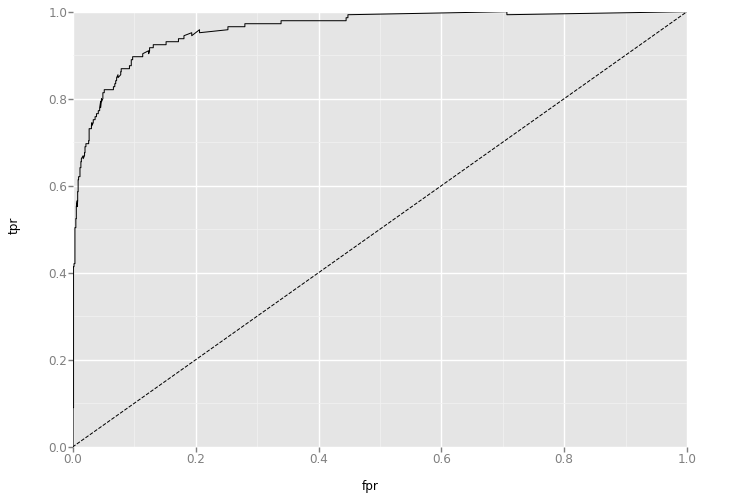

<ggplot: (96653564558)>

In [20]:
# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
from ggplot import *

lr_probs = lr_model.model.predict_proba(X_test)
lr_preds = lr_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,lr_preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, lr_preds))

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])

### 3.2.2 Logistic Regression (Standardize all input variables)

#### Standardize the variables

In [21]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# standardization of variables
min_max_scaler = MinMaxScaler()
Xs = min_max_scaler.fit_transform(X)

pd.DataFrame(Xs).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,0.501330,0.472815,0.304697,0.463824,0.193593,0.439470,0.089188,0.104285,0.061035,0.597009,0.294058
std,0.263273,0.263069,0.213484,0.382815,0.174769,0.419873,0.160360,0.305660,0.239418,0.490549,0.455664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279070,0.250000,0.143519,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.511628,0.465116,0.259259,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.720930,0.697674,0.416667,0.666667,0.260000,1.000000,0.159055,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Split the standardized data 

In [22]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, random_state=1)


#### Run Logistic Regression with standardized data

In [23]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear','newton-cg', 'sag', 'lbfgs' ]}
]

# Create grid search object

grid = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

grid.fit(Xs_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best parameters:  {'classifier': LogisticRegression(C=206.913808111479, solver='liblinear'), 'classifier__C': 206.913808111479, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best score:  0.9500446405125781


In [24]:
# print(lr_model_s)

print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


Best parameters:  {'classifier': LogisticRegression(C=206.913808111479, solver='liblinear'), 'classifier__C': 206.913808111479, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best score:  0.9500446405125781


In [25]:
# Build model with logistic regression
lr_model_s = LogisticReg(C=206.913808111479,solver='liblinear')
lr_model_s.fit(Xs_train,y_train)


# predict the class label
yhat = lr_model_s.model.predict(Xs_test)
# summarize the predicted class
# print('Predicted Class: %d' % yhat[0])
y_diff = yhat == y_test
unique, counts = np.unique(y_diff, return_counts=True)
print('Accuracy of test data: %.3f ' % (counts[1]/(counts[0] + counts[1])))

Accuracy of test data: 0.842 


In [26]:
print(lr_model_s.model.score(Xs_train,y_train)*100)
print(accuracy_score(y_test, yhat)*100)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

95.17759168351141
95.42087542087542
[[1323   17]
 [  51   94]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.85      0.65      0.73       145

    accuracy                           0.95      1485
   macro avg       0.90      0.82      0.85      1485
weighted avg       0.95      0.95      0.95      1485



In [27]:
print('Features', "|",'Coef', "|", 'P-value' )
for i in range(len(X_train.columns)):
    print(X_train.columns[i], "|",lr_model_s.model.coef_[0,i], "|", lr_model_s.p_values[i] )

Features | Coef | P-value
Age | -2.6739140528851806 | 0.39568214548726566
Experience | 3.0581745872386032 | 0.33276455136511296
Income | 11.583736879399805 | 1.417819933018845e-152
Family | 2.017766387124986 | 7.176864559697684e-18
CCAvg | 1.213024005296991 | 0.010193550838007078
Education | 3.326110186878161 | 4.5401205731305476e-52
Mortgage | 0.5803791448936666 | 0.1575904320909327
Securities Account | -0.831930866262461 | 0.01551133135852197
CD Account | 3.92064733421696 | 2.6133183025511488e-23
Online | -0.7025779524420458 | 0.00016261690191901173
CreditCard | -1.2885252757673786 | 2.3795407149796337e-07


AUC Score (Test): 0.960304


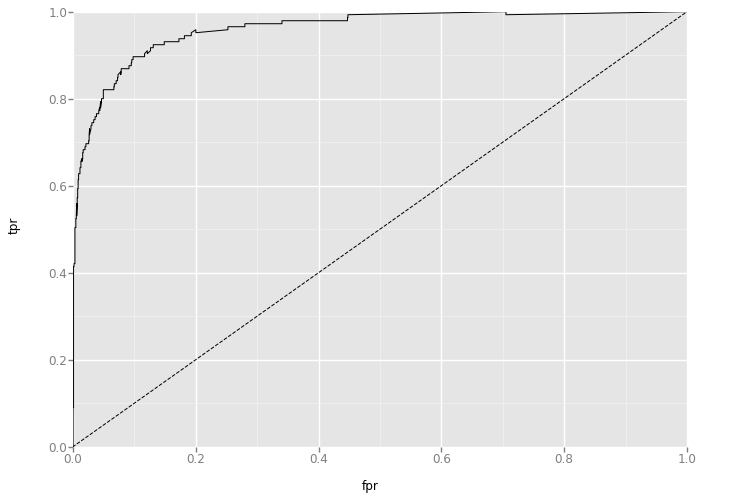

<ggplot: (96656323389)>

In [28]:
# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# from ggplot import *

lr_s_probs = lr_model_s.model.predict_proba(Xs_test)
lr_s_preds = lr_s_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,lr_s_preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, lr_s_preds))

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])

#### Drop Experience Variable and rerun logistic regression

In [29]:
Xd = X.drop('Experience', axis = 1)
Xd


# standardization of variables
min_max_scaler = MinMaxScaler()
Xds = min_max_scaler.fit_transform(Xd)

pd.DataFrame(Xds).describe()


,0,1,2,3,4,5,6,7,8,9
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,0.501330,0.304697,0.463824,0.193593,0.439470,0.089188,0.104285,0.061035,0.597009,0.294058
std,0.263273,0.213484,0.382815,0.174769,0.419873,0.160360,0.305660,0.239418,0.490549,0.455664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279070,0.143519,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.511628,0.259259,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.720930,0.416667,0.666667,0.260000,1.000000,0.159055,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
Xds_train, Xds_test, y_train, y_test = train_test_split(Xds, y, test_size=0.30, random_state=1)


In [31]:
# Create first pipeline for base without reducing features.
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear','newton-cg', 'sag', 'lbfgs' ]}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

lr_model_ds = clf.fit(Xds_train, y_train)

print(lr_model_ds)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=11.288378916846883,
                                                            solver='newton-cg')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['liblinear', 'newton-cg',
                                                 'sag', 'lbfgs']}],
             verbose=True)


In [32]:
# Build model with logistic regression
lr_model_ds = LogisticReg(C=11.288378916846883,solver='newton-cg')
lr_model_ds.fit(Xds_train,y_train)


# predict the class label
yhat = lr_model_ds.model.predict(Xds_test)
# summarize the predicted class
# print('Predicted Class: %d' % yhat[0])
y_diff = yhat == y_test
unique, counts = np.unique(y_diff, return_counts=True)
print('Accuracy of test data: %.3f ' % (counts[1]/(counts[0] + counts[1])))

print(lr_model_ds.model.score(Xds_train,y_train)*100)
print(accuracy_score(y_test, yhat)*100)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

Accuracy of test data: 0.843 
95.17759168351141
95.48821548821549
[[1324   16]
 [  51   94]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1340
           1       0.85      0.65      0.74       145

    accuracy                           0.95      1485
   macro avg       0.91      0.82      0.86      1485
weighted avg       0.95      0.95      0.95      1485



In [33]:
print('Features', "|",'Coef', "|", 'P-value' )
for i in range(len(Xd.columns)):
    print(Xd.columns[i], "|",lr_model_ds.model.coef_[0,i], "|", lr_model_ds.p_values[i] )

Features | Coef | P-value
Age | 0.3502451527471387 | 0.2504233740201046
Income | 11.16280756362248 | 4.43307809283448e-149
Family | 1.9441673410135196 | 2.2760020669130464e-17
CCAvg | 1.2768188330468648 | 0.006139832624308135
Education | 3.17615983604297 | 5.458261614640941e-54
Mortgage | 0.5744481790043688 | 0.15662365582973883
Securities Account | -0.7893712191591613 | 0.01905705782336321
CD Account | 3.8060558930719015 | 7.114318908346909e-23
Online | -0.6697891322584686 | 0.0002562937412224783
CreditCard | -1.2426587851427346 | 4.107350535734944e-07


#### Plot ROC of Logistic Regression

AUC Score (Test): 0.960345


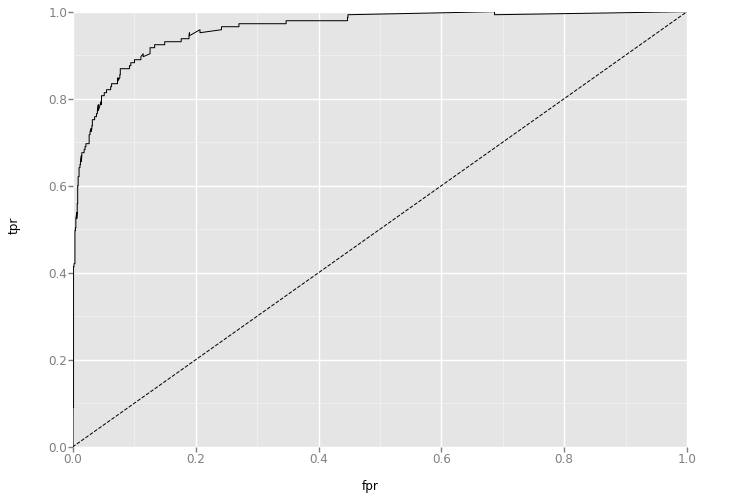

<ggplot: (96656360930)>

In [34]:
# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# from ggplot import *

lr_ds_probs = lr_model_ds.model.predict_proba(Xds_test)
lr_ds_preds = lr_ds_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,lr_ds_preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, lr_ds_preds))

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])

#### Drop Age

In [35]:
Xd = Xd.drop('Age', axis = 1)
Xd


# standardization of variables
min_max_scaler = MinMaxScaler()
Xds = min_max_scaler.fit_transform(Xd)

pd.DataFrame(Xds).describe()


Xds_train, Xds_test, y_train, y_test = train_test_split(Xds, y, test_size=0.30, random_state=1)


pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear','newton-cg', 'sag', 'lbfgs' ]}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

lr_model_ds = clf.fit(Xds_train, y_train)

print(lr_model_ds)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=78.47599703514607,
                                                            solver='liblinear')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['liblinear', 'newton-cg',
                                                 'sag', 'lbfgs']}],
             verbose=True)


Accuracy of test data: 0.841 
95.06208489748774
95.42087542087542
[[1322   18]
 [  50   95]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.84      0.66      0.74       145

    accuracy                           0.95      1485
   macro avg       0.90      0.82      0.86      1485
weighted avg       0.95      0.95      0.95      1485

Features | Coef | P-value
Income | 11.481408950701674 | 3.887723631226292e-178
Family | 1.9804411607681864 | 5.763694291795713e-18
CCAvg | 1.1482340981220058 | 0.01488990442401488
Education | 3.2515407963082623 | 4.377154467056223e-60
Mortgage | 0.5602949769433826 | 0.1712787053712661
Securities Account | -0.8182786550259137 | 0.016535656336210423
CD Account | 3.91874348186332 | 1.3926926954182993e-23
Online | -0.6884412326940722 | 0.00019993344568407343
CreditCard | -1.2774282511267592 | 2.868757995149856e-07
AUC Score (Test): 0.960648


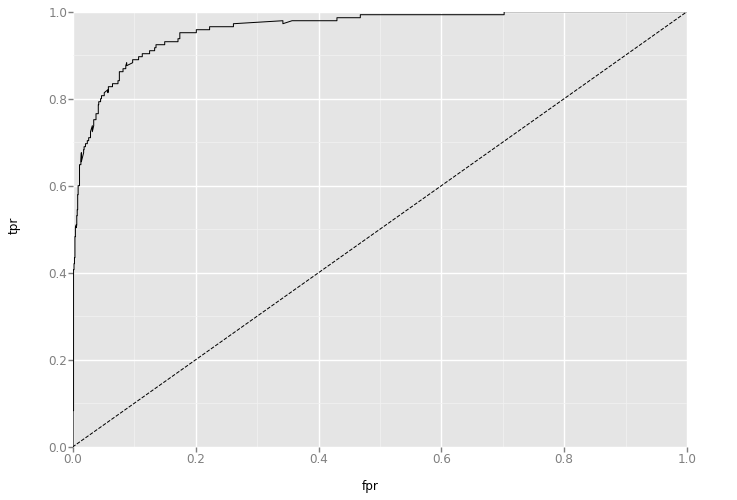

<ggplot: (96656369869)>

In [36]:
# Build model with logistic regression
lr_model_ds = LogisticReg(C=78.47599703514607,solver='liblinear')
lr_model_ds.fit(Xds_train,y_train)


# predict the class label
yhat = lr_model_ds.model.predict(Xds_test)
# summarize the predicted class
# print('Predicted Class: %d' % yhat[0])
y_diff = yhat == y_test
unique, counts = np.unique(y_diff, return_counts=True)
print('Accuracy of test data: %.3f ' % (counts[1]/(counts[0] + counts[1])))

print(lr_model_ds.model.score(Xds_train,y_train)*100)
print(accuracy_score(y_test, yhat)*100)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

print('Features', "|",'Coef', "|", 'P-value' )
for i in range(len(Xd.columns)):
    print(Xd.columns[i], "|",lr_model_ds.model.coef_[0,i], "|", lr_model_ds.p_values[i] )
    
# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# from ggplot import *

lr_ds_probs = lr_model_ds.model.predict_proba(Xds_test)
lr_ds_preds = lr_ds_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,lr_ds_preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, lr_ds_preds))

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])

#### Drop Mortgage 

In [37]:
Xd = Xd.drop('Mortgage', axis = 1)
Xd


# standardization of variables
min_max_scaler = MinMaxScaler()
Xds = min_max_scaler.fit_transform(Xd)

pd.DataFrame(Xds).describe()


Xds_train, Xds_test, y_train, y_test = train_test_split(Xds, y, test_size=0.30, random_state=1)


pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear','newton-cg', 'sag', 'lbfgs' ]}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

lr_model_ds = clf.fit(Xds_train, y_train)

print(lr_model_ds)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=1.623776739188721,
                                                            solver='newton-cg')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['liblinear', 'newton-cg',
                                                 'sag', 'lbfgs']}],
             verbose=True)


Accuracy of test data: 0.846 
95.00433150447589
95.35353535353536
[[1326   14]
 [  55   90]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.87      0.62      0.72       145

    accuracy                           0.95      1485
   macro avg       0.91      0.81      0.85      1485
weighted avg       0.95      0.95      0.95      1485

Features | Coef | P-value
Income | 9.395907431911393 | 1.3031867928232133e-148
Family | 1.6588983031852313 | 2.6379583694144517e-15
CCAvg | 1.4449546682973342 | 0.0010239915768565531
Education | 2.707634524037221 | 1.8665523915066976e-49
Securities Account | -0.6629927786246755 | 0.032811236531604594
CD Account | 3.3424712618329715 | 4.511071377789035e-21
Online | -0.5698812578181885 | 0.0008233599345296252
CreditCard | -1.079591492929177 | 2.1549254176634043e-06
AUC Score (Test): 0.961415


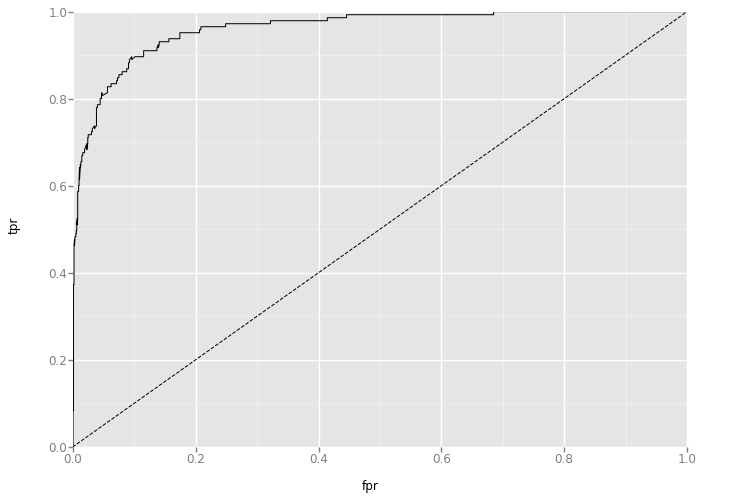

<ggplot: (96656398361)>

In [38]:
# Build model with logistic regression
lr_model_ds = LogisticReg(C=1.623776739188721,solver='newton-cg')
lr_model_ds.fit(Xds_train,y_train)


# predict the class label
yhat = lr_model_ds.model.predict(Xds_test)
# summarize the predicted class
# print('Predicted Class: %d' % yhat[0])
y_diff = yhat == y_test
unique, counts = np.unique(y_diff, return_counts=True)
print('Accuracy of test data: %.3f ' % (counts[1]/(counts[0] + counts[1])))

print(lr_model_ds.model.score(Xds_train,y_train)*100)
print(accuracy_score(y_test, yhat)*100)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

print('Features', "|",'Coef', "|", 'P-value' )
for i in range(len(Xd.columns)):
    print(Xd.columns[i], "|",lr_model_ds.model.coef_[0,i], "|", lr_model_ds.p_values[i] )
    
# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# from ggplot import *

lr_ds_probs = lr_model_ds.model.predict_proba(Xds_test)
lr_ds_preds = lr_ds_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,lr_ds_preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, lr_ds_preds))

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])

## Build Random Forest Model with Default Parameter

In [70]:
rfc = RandomForestClassifier()#Use default hyper paramenters
rfc.fit(Xs_train,y_train)#fit the model


# Performance on Training data
y_train, y_train_pred = y_train, rfc.predict(Xs_train)
print("Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, y_train_pred))

y_train_proba = rfc.predict_proba(Xs_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_train_proba))


# Performance on Test data
y_test, y_test_pred = y_test, rfc.predict(Xs_test)
print("Accuracy (test): %.4g" % metrics.accuracy_score(y_test, y_test_pred))

y_test_proba = rfc.predict_proba(Xs_test)[:,1]
print("AUC Score (test): %f" % metrics.roc_auc_score(y_test, y_test_proba))

Accuracy (Train): 1
AUC Score (Train): 1.000000
Accuracy (test): 0.9845
AUC Score (test): 0.997419


In [71]:
# check var importance
# print(RF_Model.feature_importances_)

importances = rfc.feature_importances_

# std = np.std([RF_Model.feature_importances_ for tree in RF_Model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking of model:")

for f in range(X_train.shape[1]):
    print("%d. feature %d | %s | (%f)" % (f + 1, indices[f],  X_train.columns[indices[f]], importances[indices[f]]))
   


top_feature =[]
for i in range(10):
    top_feature.append(X_train.columns[indices[i]])

# print(top_feature)

Feature ranking of model:
1. feature 2 | Income | (0.346194)
2. feature 5 | Education | (0.187451)
3. feature 4 | CCAvg | (0.179854)
4. feature 3 | Family | (0.109498)
5. feature 8 | CD Account | (0.045730)
6. feature 0 | Age | (0.038638)
7. feature 1 | Experience | (0.037673)
8. feature 6 | Mortgage | (0.035782)
9. feature 10 | CreditCard | (0.008026)
10. feature 9 | Online | (0.007174)
11. feature 7 | Securities Account | (0.003981)


In [72]:
top_feature

['Income',
 'Education',
 'CCAvg',
 'Family',
 'CD Account',
 'Age',
 'Experience',
 'Mortgage',
 'CreditCard',
 'Online']

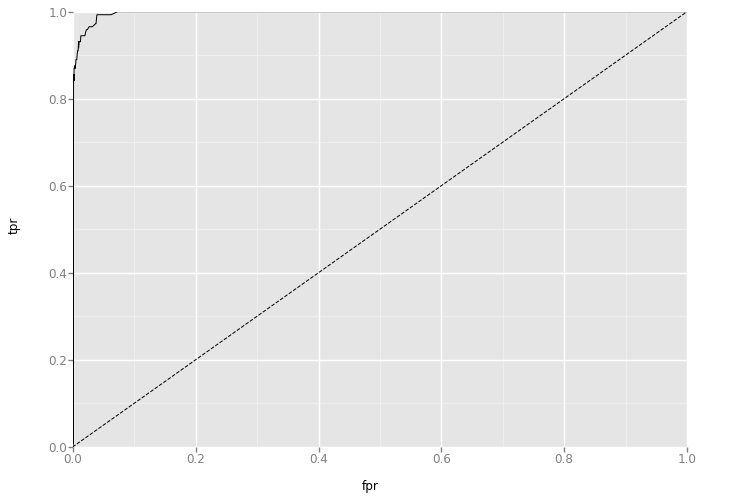

<ggplot: (96664939499)>

In [74]:
# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification


probs = rfc.predict_proba(Xs_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])

In [75]:
#print confusion matrix
y_pred = (rfc.predict_proba(Xs_test)[:,1]>0.5).astype(int)
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

[[1338    2]
 [  21  124]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1340
           1       0.98      0.86      0.92       145

    accuracy                           0.98      1485
   macro avg       0.98      0.93      0.95      1485
weighted avg       0.98      0.98      0.98      1485



## Random Forest with reduced variables

Feature ranking of model:
1. feature 0 | Income | (0.359090)
2. feature 3 | Education | (0.230051)
3. feature 2 | CCAvg | (0.174528)
4. feature 1 | Family | (0.130522)
5. feature 6 | CD Account | (0.047079)
6. feature 4 | Mortgage | (0.034841)
7. feature 8 | CreditCard | (0.010054)
8. feature 7 | Online | (0.009406)
9. feature 5 | Securities Account | (0.004428)
[[1336    4]
 [  22  123]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1340
           1       0.97      0.85      0.90       145

    accuracy                           0.98      1485
   macro avg       0.98      0.92      0.95      1485
weighted avg       0.98      0.98      0.98      1485

AUC Score (Test): 0.998060


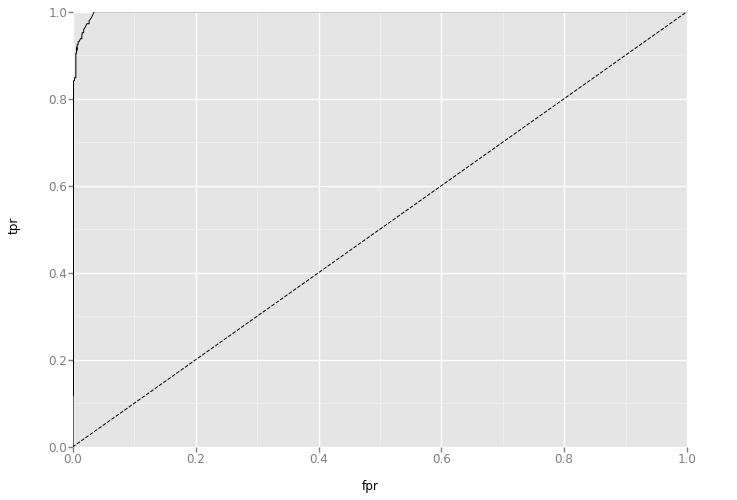

<ggplot: (96664931967)>

In [81]:
# Drop variable 'Age'& 'Experience' to be comparable with logistic regression model


Xd = X.drop(['Age','Experience'], axis = 1)

# standardization of variables
min_max_scaler = MinMaxScaler()
Xds = min_max_scaler.fit_transform(Xd)

pd.DataFrame(Xds).describe()

Xds_train, Xds_test, y_train, y_test = train_test_split(Xds, y, test_size=0.30, random_state=1)



rfc = RandomForestClassifier()#Use default hyper paramenters
rfc.fit(Xds_train,y_train)#fit the model



# check var importance
# print(RF_Model.feature_importances_)

importances = rfc.feature_importances_

# std = np.std([RF_Model.feature_importances_ for tree in RF_Model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking of model:")

for f in range(Xds_train.shape[1]):
    print("%d. feature %d | %s | (%f)" % (f + 1, indices[f],  Xd.columns[indices[f]], importances[indices[f]]))

    

#print confusion matrix
y_pred = (rfc.predict_proba(Xds_test)[:,1]>0.5).astype(int)
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
from ggplot import *

probs = rfc.predict_proba(Xds_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, preds))

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])

#### Ramdom Forest with Grid Search

In [82]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : (50,100,200,300)
              ,'criterion' : ('gini','entropy')
              ,'max_depth' : (2,5,7,10)
              ,'max_features' : ('auto','sqrt')
              ,'min_samples_leaf' : (3,5,10,30)
              ,'min_samples_split' : (3,5,10,30)
              #,'min_weight_fraction_leaf' : (0.0,0.1,0.2,0.3)
             }

RF_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = parameters, cv = 3, verbose = True)

RF_grid_model = RF_grid.fit(Xds_train, y_train)

RF_grid_model.best_estimator_

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50, n_jobs=-1)

Feature ranking of model:
1. feature 0 | Income | (0.435464)
2. feature 2 | CCAvg | (0.207764)
3. feature 3 | Education | (0.154706)
4. feature 1 | Family | (0.101455)
5. feature 6 | CD Account | (0.052162)
6. feature 4 | Mortgage | (0.033451)
7. feature 8 | CreditCard | (0.007466)
8. feature 7 | Online | (0.004304)
9. feature 5 | Securities Account | (0.003229)
[[1336    4]
 [  21  124]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1340
           1       0.97      0.86      0.91       145

    accuracy                           0.98      1485
   macro avg       0.98      0.93      0.95      1485
weighted avg       0.98      0.98      0.98      1485

AUC Score (Test): 0.997535


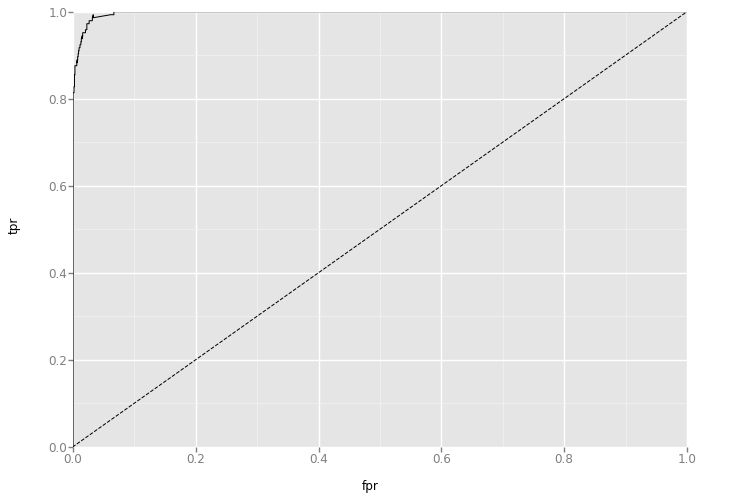

<ggplot: (96662526880)>

In [86]:
# Build model with best estimates
RF_Model = RandomForestClassifier(
                                  criterion ='entropy',  
                                  max_depth=7,        
                                  max_features='sqrt',                              
                                  min_samples_leaf=3,
                                  min_samples_split=3,
                                  n_estimators =50,
                                  n_jobs=-1,
                                  random_state=3
                                  )
RF_Model.fit(Xds_train,y_train)



# check var importance
# print(RF_Model.feature_importances_)

importances = RF_Model.feature_importances_

# std = np.std([RF_Model.feature_importances_ for tree in RF_Model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking of model:")

for f in range(Xds_train.shape[1]):
    print("%d. feature %d | %s | (%f)" % (f + 1, indices[f],  Xd.columns[indices[f]], importances[indices[f]]))

    

#print confusion matrix
y_pred = (RF_Model.predict_proba(Xds_test)[:,1]>0.5).astype(int)
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

# Plot ROC 

# import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
from ggplot import *

probs = RF_Model.predict_proba(Xds_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, preds))

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + \
scale_x_continuous(expand = [0, 0], limits = [0,1]) + \
scale_y_continuous(expand = [0, 0], limits = [0,1])